# Figure S7 : Barplot Gene proportion per epithelial cell type

In [4]:
# LOAD LIBRARIES
library(Seurat)
library(SeuratDisk)
library(SingleR)
library(scuttle)
library(tidyverse)
library(dplyr)
library(purrr)
library(ggpubr)
library(ggh4x)

In [7]:
  #--------------------------------------------
  # GDA 
  ## Extract the proportion of cells 
  
  for (species in c("Macaque","Marmoset","MousePseudopregnant", "Human")) {
    
    if (species =="MousePseudopregnant" | species =="Mouse") {
      gene = "Gda"
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(object = sobj) = "RNA"
      
      # Collecting normalised GDA expression for each cell
      sobj$GDA_expression = FetchData(sobj, vars = gene, slot = "data")
      
    } else {
      gene = "GDA" 
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(object = sobj) = "RNA"
      
      # Collecting normalised GDA expression for each cell
      sobj$GDA_expression = FetchData(sobj, vars = gene, slot = "data")
    }
    # Compute the proportion of cells per cluster expression GDA
    GDA_PropCluster = sobj@meta.data %>%  
      mutate(GDA = ifelse(sobj$GDA_expression > 0, "yes", "no")) %>% 
      group_by(Manual_annotation, GDA) %>% 
      summarise(n = n()) %>% 
      group_by(Manual_annotation) %>%
      mutate(prop = n/sum(n)) %>%
      mutate(Species = name)
    assign(paste0(name, "_GDA_Proportion"),GDA_PropCluster)
  }   

GDA_proportion = rbind(Human_GDA_Proportion, MousePseudopregnant_GDA_Proportion, Macaque_GDA_Proportion, Marmoset_GDA_Proportion) %>% 
    filter(Manual_annotation != "Stromal" & Manual_annotation != "Lymphoid" & Manual_annotation != "Myometrial" & Manual_annotation != "MUC5B" &  Manual_annotation != "Myeloid" &   Manual_annotation != "Immune" & Manual_annotation != "Myometrium" & Manual_annotation != "Endothelial" )

# filter(Manual_annotation == "Epithelial Luminal" | Manual_annotation == "Epithelial Glandular-Secretory" | Manual_annotation == "Epithelial Ciliated" | Manual_annotation == "Epithelial proliferating" |Manual_annotation == "Epithelial_Glandular" | Manual_annotation == "Epithelial_Luminal" |Manual_annotation == "Epithelial_glandular" | Manual_annotation == "Epithelial_luminal" | Manual_annotation=="Epithelial_precursors" )
GDA_proportion$Manual_annotation = str_replace(GDA_proportion$Manual_annotation, "_", " ")
GDA_proportion$GDA = as.factor(GDA_proportion$GDA)
GDA_proportion$Manual_annotation = str_remove(GDA_proportion$Manual_annotation, "Epithelial ")
GDA_proportion$Manual_annotation = str_remove(GDA_proportion$Manual_annotation, "-Secretory")
GDA_proportion$Manual_annotation = str_replace(string = GDA_proportion$Manual_annotation, pattern = "proliferating", replacement = "Proliferating")


  
  # Save the table 
  write.table(GDA_proportion, file = "../../../results/snRNA-seq/Proportion_EpithelialCell_Expressing_GDA_withMousePseudopregnant_v4.tab", sep = "\t")
  
  # Stalked barplot 
  ggplot(GDA_proportion, mapping = aes(x = Manual_annotation, y = prop, fill =  GDA)) + 
    geom_bar(position= "stack", stat = "identity") +
    facet_grid(~ Species, scales = "free_x", space = "free") + #,  
    scale_fill_manual(values = c("grey77","#8A51A4")) + 
    scale_y_continuous(labels = scales::percent) +
    labs(y="", x="") + 
    theme_minimal(base_size = 12) +
    theme(plot.title = element_text(face="bold", 
                                    size = 12,
                                    margin = 20), 
          axis.title = element_text(face ="plain",
                                    size = 12, 
                                    margin = 5),
          axis.text = element_text(face = "plain", 
                                   size = 12, 
                                   angle = 45, hjust = 1),
          strip.text = element_text(face = "plain", 
                                    size = 12),
          panel.grid.minor = element_blank(), 
          panel.grid.major = element_blank())
  
  ggsave("../../../figures/pieces/GDA_prop_by_cluster_min0_MousePseudopregnant_v4.pdf", width = 6, height = 7)
  

`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.


In [8]:

  #--------------------------------------------
  # CDA 
  ## Extract the proportion of cells 
  
  for (species in c("Macaque","Marmoset","MousePseudopregnant", "Human")) {
    
    if (species =="MousePseudopregnant" | species == "Mouse") {
      gene = "Cda"
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(object = sobj) = "RNA"
      
      # Collecting normalised CDA expression for each cell
      sobj$CDA_expression = FetchData(sobj, vars = gene, slot = "data")
      
    } else {
      gene = "CDA" 
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(object = sobj) = "RNA"
      
      # Collecting normalised CDA expression for each cell
      sobj$CDA_expression = FetchData(sobj, vars = gene, slot = "data")
    }
    # Compute the proportion of cells per cluster expression CDA
    CDA_PropCluster = sobj@meta.data %>%  
      mutate(CDA = ifelse(sobj$CDA_expression > 0, "yes", "no")) %>% 
      group_by(Manual_annotation, CDA) %>% 
      summarise(n = n()) %>% 
      group_by(Manual_annotation) %>%
      mutate(prop = n/sum(n)) %>%
      mutate(Species = name)
    assign(paste0(name, "_CDA_Proportion"),CDA_PropCluster)
  }    
  
CDA_proportion = rbind(Human_CDA_Proportion, MousePseudopregnant_CDA_Proportion, Macaque_CDA_Proportion, Marmoset_CDA_Proportion)%>% 
    filter(Manual_annotation != "Stromal" & Manual_annotation != "Lymphoid" & Manual_annotation != "Myometrial" & Manual_annotation != "MUC5B" &  Manual_annotation != "Myeloid" &   Manual_annotation != "Immune" & Manual_annotation != "Myometrium" & Manual_annotation != "Endothelial" )

#   filter(Manual_annotation == "Epithelial Luminal" | Manual_annotation == "Epithelial Glandular-Secretory" | Manual_annotation == "Epithelial Ciliated" | Manual_annotation == "Epithelial proliferating" |Manual_annotation == "Epithelial_Glandular" | Manual_annotation == "Epithelial_Luminal" |Manual_annotation == "Epithelial_glandular" | Manual_annotation == "Epithelial_luminal" | Manual_annotation=="Epithelial_precursors" )
CDA_proportion$Manual_annotation = str_replace(CDA_proportion$Manual_annotation, "_", " ")
CDA_proportion$CDA = as.factor(CDA_proportion$CDA)
CDA_proportion$Manual_annotation = str_remove(CDA_proportion$Manual_annotation, "Epithelial ")
CDA_proportion$Manual_annotation = str_remove(CDA_proportion$Manual_annotation, "-Secretory")
CDA_proportion$Manual_annotation = str_replace(string = CDA_proportion$Manual_annotation, pattern = "proliferating", replacement = "Proliferating")

# Save the table 
write.table(CDA_proportion, file = "../../../results/snRNA-seq/Proportion_EpithelialCell_Expressing_CDA_MousePseudopregnant_v4.tab", sep = "\t")


# Stalked barplot 
ggplot(CDA_proportion, mapping = aes(x = Manual_annotation, y = prop, fill =  CDA)) + 
geom_bar(position= "stack", stat = "identity") +
facet_grid(~ Species,scales = "free_x", space = "free") + #, scales = "free_x" 
scale_fill_manual(values = c("grey77","#8A51A4")) + 
scale_y_continuous(labels = scales::percent) +
labs(y="", x="") + 
theme_minimal(base_size = 12) +
theme(plot.title = element_text(face="bold", 
                                size = 12,
                                margin = 20), 
      axis.title = element_text(face ="plain",
                                size = 12, 
                                margin = 5),
      axis.text = element_text(face = "plain", 
                               size = 12, 
                               angle = 45, hjust = 1),
      strip.text = element_text(face = "plain", 
                                size = 12),
      panel.grid.minor = element_blank(), 
      panel.grid.major = element_blank())

ggsave("../../../figures/pieces/CDA_prop_by_cluster_min0_MousePseudopregnant_v4.pdf", width = 6, height = 7)


`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.


`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.


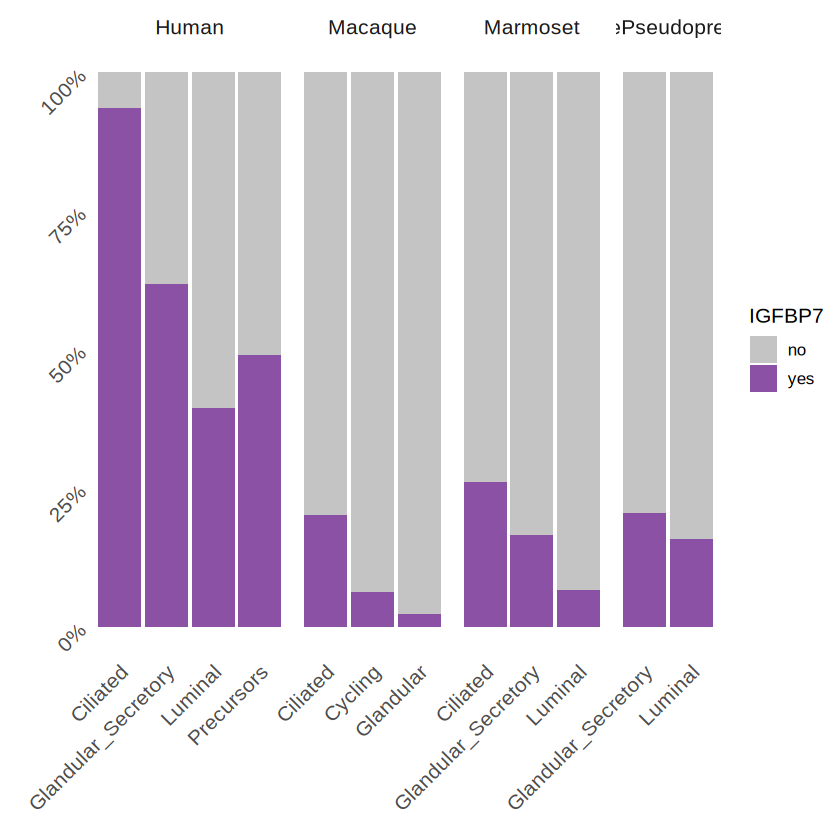

In [10]:

  #--------------------------------------------
  # IGFBP7 
  ## Extract the proportion of cells 
  
  for (species in c("Macaque","Marmoset","MousePseudopregnant", "Human")) {
    
    if (species =="MousePseudopregnant" | species == "Mouse") {
      gene = "Igfbp7"
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(object = sobj) = "RNA"
      
      # Collecting normalised IGFBP7 expression for each cell
      sobj$IGFBP7_expression = FetchData(sobj, vars = gene, slot = "data")
      
    } else {
      gene = "IGFBP7" 
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(object = sobj) = "RNA"
      
      # Collecting normalised IGFBP7 expression for each cell
      sobj$IGFBP7_expression = FetchData(sobj, vars = gene, slot = "data")
    }
    # Compute the proportion of cells per cluster expression IGFBP7
    IGFBP7_PropCluster = sobj@meta.data %>%  
      mutate(IGFBP7 = ifelse(sobj$IGFBP7_expression > 0, "yes", "no")) %>% 
      group_by(Manual_annotation, IGFBP7) %>% 
      summarise(n = n()) %>% 
      group_by(Manual_annotation) %>%
      mutate(prop = n/sum(n)) %>%
      mutate(Species = name)
    assign(paste0(name, "_IGFBP7_Proportion"),IGFBP7_PropCluster)
  }    
  
IGFBP7_proportion = rbind(Human_IGFBP7_Proportion, MousePseudopregnant_IGFBP7_Proportion, Macaque_IGFBP7_Proportion, Marmoset_IGFBP7_Proportion)%>% 
    filter(Manual_annotation != "Stromal" & Manual_annotation != "Lymphoid" & Manual_annotation != "Myometrial" & Manual_annotation != "MUC5B" &  Manual_annotation != "Myeloid" &   Manual_annotation != "Immune" & Manual_annotation != "Myometrium" & Manual_annotation != "Endothelial" )

#   filter(Manual_annotation == "Epithelial Luminal" | Manual_annotation == "Epithelial Glandular-Secretory" | Manual_annotation == "Epithelial Ciliated" | Manual_annotation == "Epithelial proliferating" |Manual_annotation == "Epithelial_Glandular" | Manual_annotation == "Epithelial_Luminal" |Manual_annotation == "Epithelial_glandular" | Manual_annotation == "Epithelial_luminal" | Manual_annotation=="Epithelial_precursors" )
IGFBP7_proportion$Manual_annotation = str_replace(IGFBP7_proportion$Manual_annotation, "_", " ")
IGFBP7_proportion$IGFBP7 = as.factor(IGFBP7_proportion$IGFBP7)
IGFBP7_proportion$Manual_annotation = str_remove(IGFBP7_proportion$Manual_annotation, "Epithelial ")
IGFBP7_proportion$Manual_annotation = str_remove(IGFBP7_proportion$Manual_annotation, "-Secretory")
IGFBP7_proportion$Manual_annotation = str_replace(string = IGFBP7_proportion$Manual_annotation, pattern = "proliferating", replacement = "Proliferating")

# Save the table 
write.table(IGFBP7_proportion, file = "../../../results/snRNA-seq/Proportion_EpithelialCell_Expressing_IGFBP7_MousePseudopregnant_v4.tab", sep = "\t")


# Stalked barplot 
ggplot(IGFBP7_proportion, mapping = aes(x = Manual_annotation, y = prop, fill =  IGFBP7)) + 
geom_bar(position= "stack", stat = "identity") +
facet_grid(~ Species,scales = "free_x", space = "free") + #, scales = "free_x" 
scale_fill_manual(values = c("grey77","#8A51A4")) + 
scale_y_continuous(labels = scales::percent) +
labs(y="", x="") + 
theme_minimal(base_size = 12) +
theme(plot.title = element_text(face="bold", 
                                size = 12,
                                margin = 20), 
      axis.title = element_text(face ="plain",
                                size = 12, 
                                margin = 5),
      axis.text = element_text(face = "plain", 
                               size = 12, 
                               angle = 45, hjust = 1),
      strip.text = element_text(face = "plain", 
                                size = 12),
      panel.grid.minor = element_blank(), 
      panel.grid.major = element_blank())

ggsave("../../../figures/pieces/IGFBP7_prop_by_cluster_min0_MousePseudopregnant_v4.pdf", width = 6, height = 7)
